# Assignment 1: Introduction to Data Science and Python

Authors: Kevin To, Filip Cederqvist

Work load: 10 h 

Note: Data sets has been gathered from https://ourworldindata.org/.

In [670]:
# Importing packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [671]:
# Importing datasets
life = pd.read_csv("./Datasets/life-expectancy.csv")
gdp = pd.read_csv("./Datasets/GDP-2020.csv")
pop = pd.read_csv("./Datasets/population.csv")

display(life.head())
display(gdp.head())
display(pop.head())

#old = pd.read_csv(r"C:\Users\ceder\OneDrive\Skrivbord\Introduction to data sceince and AI\DIT405\Group-1-DAT405---Introduction-to-Data-Science-and-AI\Module 1\Datasets\GDP-2015.csv")
#life = pd.read_csv(r"C:\Users\ceder\OneDrive\Skrivbord\Introduction to data sceince and AI\DIT405\Group-1-DAT405---Introduction-to-Data-Science-and-AI\Module 1\Datasets\life-expectancy.csv")


,Entity,Code,Year,Life expectancy at birth (historical)
0,Afghanistan,AFG,1950,27.7
1,Afghanistan,AFG,1951,28.0
2,Afghanistan,AFG,1952,28.4
3,Afghanistan,AFG,1953,28.9
4,Afghanistan,AFG,1954,29.2


,Entity,Code,Year,GDP per capita
0,Afghanistan,AFG,2002,1189.784668
1,Afghanistan,AFG,2003,1235.810059
2,Afghanistan,AFG,2004,1200.277954
3,Afghanistan,AFG,2005,1286.793701
4,Afghanistan,AFG,2006,1315.789062


,Entity,Code,Year,Population (historical estimates)
0,Afghanistan,AFG,-10000,14737
1,Afghanistan,AFG,-9000,20405
2,Afghanistan,AFG,-8000,28253
3,Afghanistan,AFG,-7000,39120
4,Afghanistan,AFG,-6000,54166


#### a) Write a Python program that draws a scatter plot of GDP per capita vs life expectancy. State any assumptions and motivate decisions that you make when selecting data to be plotted, and in combining data.

Assumption: We remove all countries in the dataset that begins with "OWID" as they are not real countries. We also remove "countries" that are defined as continents in the dataset. Further, we only gather data from the year 2020. 

In [672]:
# Cleaning data

# Only keep data from the year 2020
life = life[life['Year'] == 2020]
gdp = gdp[gdp['Year'] == 2020]
pop = pop[pop['Year'] == 2020]

# Natural joining the two dataframes into one, removing all NaN values.
df = pd.merge(life, gdp, on=['Code', 'Year', 'Entity'],  how="inner")
df = pd.merge(df, pop, on=['Code', 'Year', 'Entity'],  how="inner")

# Removing all rows with "OWID" e.g. non-real countries
for i in df.index:
    if "OWID" in df['Code'][i]:
        df = df.drop(index=i)

display(df)

,Entity,Code,Year,Life expectancy at birth (historical),GDP per capita,Population (historical estimates)
0,Afghanistan,AFG,2020,62.6,1970.560181,38972236
1,Albania,ALB,2020,77.0,13191.952148,2866850
2,Algeria,DZA,2020,74.5,10735.382812,43451668
3,Angola,AGO,2020,62.3,6110.274414,33428490
4,Antigua and Barbuda,ATG,2020,78.8,17293.302734,92672
...,...,...,...,...,...,...
185,Uzbekistan,UZB,2020,70.3,7331.859863,33526662
186,Vanuatu,VUT,2020,70.3,2854.292480,311694
187,Vietnam,VNM,2020,75.4,8200.332031,96648680
189,Zambia,ZMB,2020,62.4,3277.816406,18927716


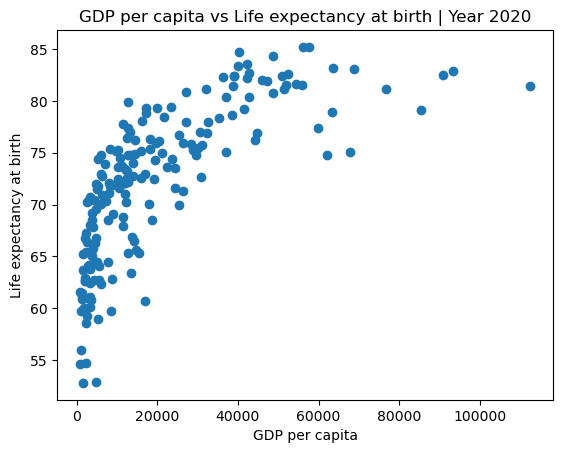

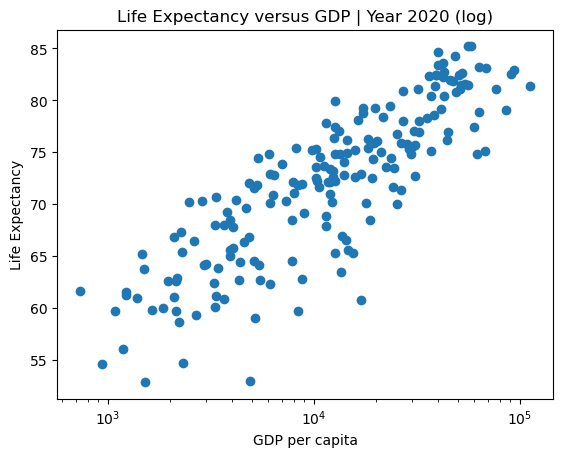

In [673]:
# Plot the data
xValues = df['GDP per capita']
yValues = df['Life expectancy at birth (historical)']

plt.scatter(xValues, yValues)
plt.xlabel('GDP per capita')
plt.ylabel('Life expectancy at birth')

plt.title('GDP per capita vs Life expectancy at birth | Year 2020')
plt.show()

plt.scatter(xValues, yValues)
plt.xscale("log")

plt.xlabel("GDP per capita")
plt.ylabel("Life Expectancy")

plt.title("Life Expectancy versus GDP | Year 2020 (log)")

plt.show()

#### b) Which countries have a life expectancy higher than one standard deviation above the mean?

Answer: See table below.

In [674]:
# Define a dataframe for the countries with a life expectancy above the mean + std
life_AM = pd.DataFrame(columns=df.columns)

# Iterate over the dataframe and add the countries that are above the mean + std to life_AM
for i in df.index:
    if df['Life expectancy at birth (historical)'][i] > (np.mean(df["Life expectancy at birth (historical)"]) + np.std(df["Life expectancy at birth (historical)"])):
        life_AM.loc[i] = df.loc[i]

# Double check what the value of one std aboie the mean is
print("One standard deviation above the mean: "+ str(np.mean(df["Life expectancy at birth (historical)"]) + np.std(df["Life expectancy at birth (historical)"])))

display(life_AM.sort_values(by=['Life expectancy at birth (historical)'], ascending=False))


One standard deviation above the mean: 79.39052132447404


,Entity,Code,Year,Life expectancy at birth (historical),GDP per capita,Population (historical estimates)
101,Macao,MAC,2020,85.2,57728.988281,676287
74,Hong Kong,HKG,2020,85.2,56153.972656,7500955
85,Japan,JPN,2020,84.7,40232.210938,125244760
7,Australia,AUS,2020,84.3,48678.683594,25670052
161,South Korea,KOR,2020,83.6,42335.867188,51844688
107,Malta,MLT,2020,83.4,39979.699219,515364
128,Norway,NOR,2020,83.2,63548.0,5379836
167,Switzerland,CHE,2020,83.1,68755.4375,8638609
155,Singapore,SGP,2020,82.9,93397.046875,5909874
123,New Zealand,NZL,2020,82.7,42774.691406,5061130


#### c) Which countries have high life expectancy but have low GDP? (note: GDP and not GDP per capita in question c and d) Motivate how you have chosen to define “high” and “low”.

We define "low" GDP to be below the  <b>median</b>  of all countries GDP since the distrubution of countries' GDP is skewed. This is illustrated in the plot above, where you can see that the values vary a lot. On the other hand, we define "high" life expectancy to be above the  <b>mean</b>  of world's life expectancy. This is because this distrubition is more like a normal distrubtion.

Answer: See table below.

In [675]:
# Calculating GDP 
df["GDP"] = df["GDP per capita"] * df["Population (historical estimates)"]

# Calculating median of GDP and mean of Life Expectancy
median_GDP = np.median(df["GDP"])
mean_LE = np.mean(df["Life expectancy at birth (historical)"])

print("Median GDP: " + str(median_GDP))
print("Mean Life Expectancy: " + str(mean_LE))

# Creating the new dataframe
res_df = df.loc[(df["GDP"] < median_GDP) &
                (df["Life expectancy at birth (historical)"] > mean_LE)]

display(res_df[["Entity", "Life expectancy at birth (historical)", "GDP"]].sort_values(
    by=['Life expectancy at birth (historical)'], ascending=False))


Median GDP: 70956242357.3125
Mean Life Expectancy: 71.93809523809517


,Entity,Life expectancy at birth (historical),GDP
101,Macao,85.2,3.904136e+10
107,Malta,83.4,2.060410e+10
76,Iceland,82.6,1.920522e+10
44,Cyprus,81.4,4.803647e+10
18,Bermuda,81.1,4.908005e+09
105,Maldives,79.9,6.556385e+09
11,Bahrain,79.2,6.128664e+10
4,Antigua and Barbuda,78.8,1.602605e+09
55,Estonia,78.3,4.687260e+10
95,Lebanon,77.8,6.505802e+10


#### d) Does every strong economy (normally indicated by GDP) have high life expectancy?

Answer: No. As can be seen below, there are some countries that have a high GDP, but still a low life expentancy.

In [676]:
# Need to check if there are countries that have high GDP, but low life expectancy.

strongEco_GDP = df.loc[(df["GDP"] > median_GDP) &
                (df["Life expectancy at birth (historical)"] < mean_LE)]

# Displaying the results sorting by GDP
display(strongEco_GDP[['Entity', 'Life expectancy at birth (historical)', 'GDP']].sort_values(
    by=['Life expectancy at birth (historical)'], ascending=True))


,Entity,Life expectancy at birth (historical),GDP
126,Nigeria,52.9,1.024288e+12
41,Cote d'Ivoire,59.0,1.389202e+11
46,Democratic Republic of Congo,59.7,1.005085e+11
29,Cameroon,60.8,9.712721e+10
3,Angola,62.3,2.042572e+11
0,Afghanistan,62.6,7.679714e+10
88,Kenya,62.7,2.256108e+11
179,Uganda,62.9,9.658140e+10
65,Ghana,64.1,1.752456e+11
20,Bolivia,64.5,9.364129e+10


#### e) Related to question d, what would happen if you use GDP per capita as an indicator of a strong economy? Explain the results you obtained, and discuss any insights you get from comparing the results of d and e.

Answer: From the tables below, it is clear that GDP per capita corrolates better with life expectancy than GDP. When GDP is the indicator of a strong economy, a lot more countries with below average life expenctancy is included. As such, GDP per capita is a better indicator for a countries wellness.

Moreover, we could also see that a high GDP don't always corrolate to a high GDP per capita. Examples of this is India and Nigeria. Both countries places high when sorting on GDP, but their GDP per capita is low. One take-away from this is that GDP doesn't really indicate anything, since it must be taken into proportion to its population. Countries with larger population generally have a larger GDP, but this does not mean that they have a high GDP per capita.

In [677]:
# Calculating median of GDP per capita
median_GDP_per_capita = np.median(df["GDP per capita"])

strongEco_GDP_per_Capita = df.loc[(df["GDP per capita"] > median_GDP_per_capita) &
                (df["Life expectancy at birth (historical)"] < mean_LE)]

# Show strong economy countries by GDP per capita
display(strongEco_GDP_per_Capita[['Entity', 'Life expectancy at birth (historical)', 'GDP per capita', 'GDP', 'Population (historical estimates)']].sort_values(
    by=['GDP per capita'], ascending=False))             

,Entity,Life expectancy at birth (historical),GDP per capita,GDP,Population (historical estimates)
143,Russia,71.3,26456.388672,3.852509e+12,145617328
87,Kazakhstan,70.0,25363.166016,4.813739e+11,18979250
145,Saint Kitts and Nevis,71.6,24319.363281,1.159207e+09,47666
71,Guyana,68.5,18679.955078,1.489179e+10,797207
111,Mexico,70.1,17852.359375,2.249367e+12,125998296
54,Equatorial Guinea,60.7,17007.625000,2.714514e+10,1596057
131,Palau,65.3,15473.251953,2.785031e+08,17999
22,Botswana,65.6,14654.651367,3.731666e+10,2546404
61,Gabon,66.5,14320.844727,3.283173e+10,2292583
9,Azerbaijan,66.9,13726.769531,1.411792e+11,10284952


In [678]:
# Show strong economy countries by GDP
display(strongEco_GDP[['Entity', 'Life expectancy at birth (historical)', 'GDP per capita', 'GDP', 'Population (historical estimates)']].sort_values(
    by=['GDP'], ascending=False))

,Entity,Life expectancy at birth (historical),GDP per capita,GDP,Population (historical estimates)
77,India,70.1,6165.746582,8.609769e+12,1396387072
143,Russia,71.3,26456.388672,3.852509e+12,145617328
78,Indonesia,68.8,11444.960938,3.111404e+12,271857984
111,Mexico,70.1,17852.359375,2.249367e+12,125998296
52,Egypt,71.0,11951.447266,1.284364e+12,107465128
130,Pakistan,66.3,4562.622559,1.036613e+12,227196736
126,Nigeria,52.9,4916.721191,1.024288e+12,208327408
160,South Africa,65.3,12665.832031,7.447753e+11,58801928
87,Kazakhstan,70.0,25363.166016,4.813739e+11,18979250
80,Iraq,69.1,9012.381836,3.835398e+11,42556988
